In [78]:
%matplotlib notebook
import numpy as np
import h5py
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl
from daxs.measurements import Source, Xas, Xes
from scipy import stats

In [96]:
name = [  #'1a','1b','1c','1d','1e','1f','1g','1h', 
          #'2c','2e','2f','2g','2h', #'2a','2b','2d', without S
          #'4c','4e','4f', #'4d','4g','4h',
          #'5a','5b','5c','5d','5e','5f','5g','5h',
          '6a','6b','6c','6d','6f','6g','6h', #,'6e'
          '7a','7c','7e'
       ] 
counter_XAS = {'x':'hdh_energy', 'signal':"gdall", "monitor":"I0t"}
counter_XES = {'x':'xes_en_texs', 'signal':"gdall", "monitor":"I0t"}

<IPython.core.display.Javascript object>


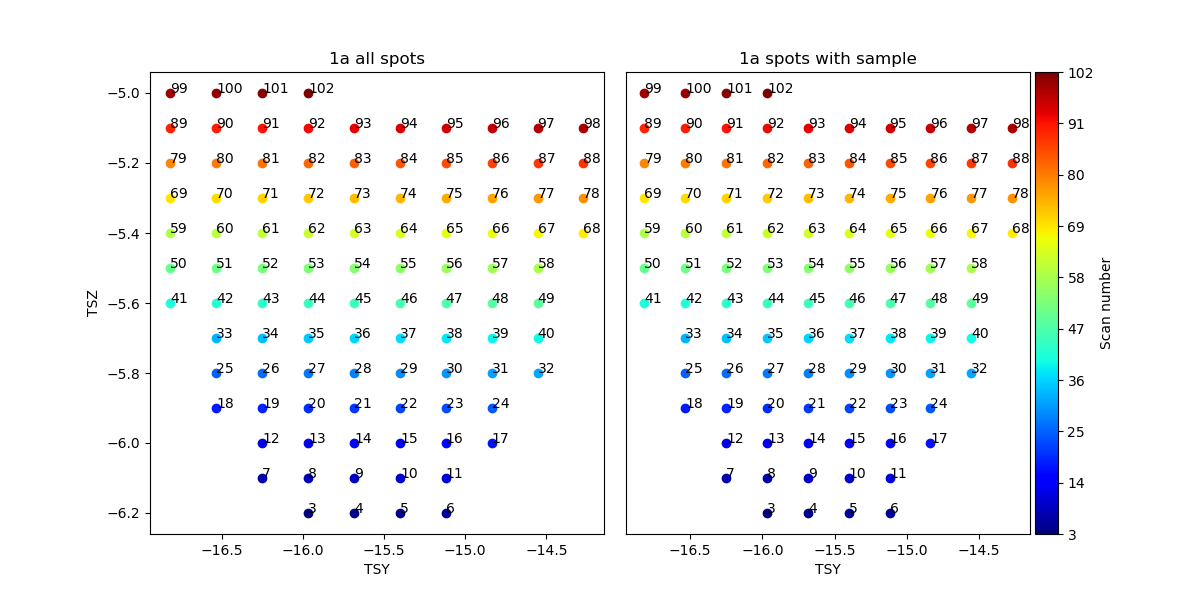

<IPython.core.display.Javascript object>


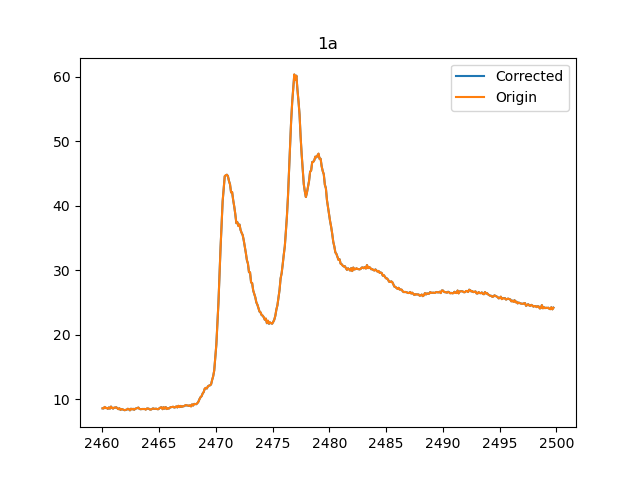

C:\Users\oppcexpv\AppData\Local\Temp\ipykernel_5316\2345580022.py:35: RuntimeWarning: invalid value encountered in true_divide
  intensity.append(np.divide(gdall[i], I0t[i]))
C:\Users\oppcexpv\AppData\Local\Temp\ipykernel_5316\2345580022.py:35: RuntimeWarning: divide by zero encountered in true_divide
  intensity.append(np.divide(gdall[i], I0t[i]))
C:\Users\oppcexpv\AppData\Local\Temp\ipykernel_5316\2345580022.py:47: RuntimeWarning: Mean of empty slice.
  if ((tail.mean()/head.mean() > 0.7) and (middle.mean()>head.mean())):


<IPython.core.display.Javascript object>


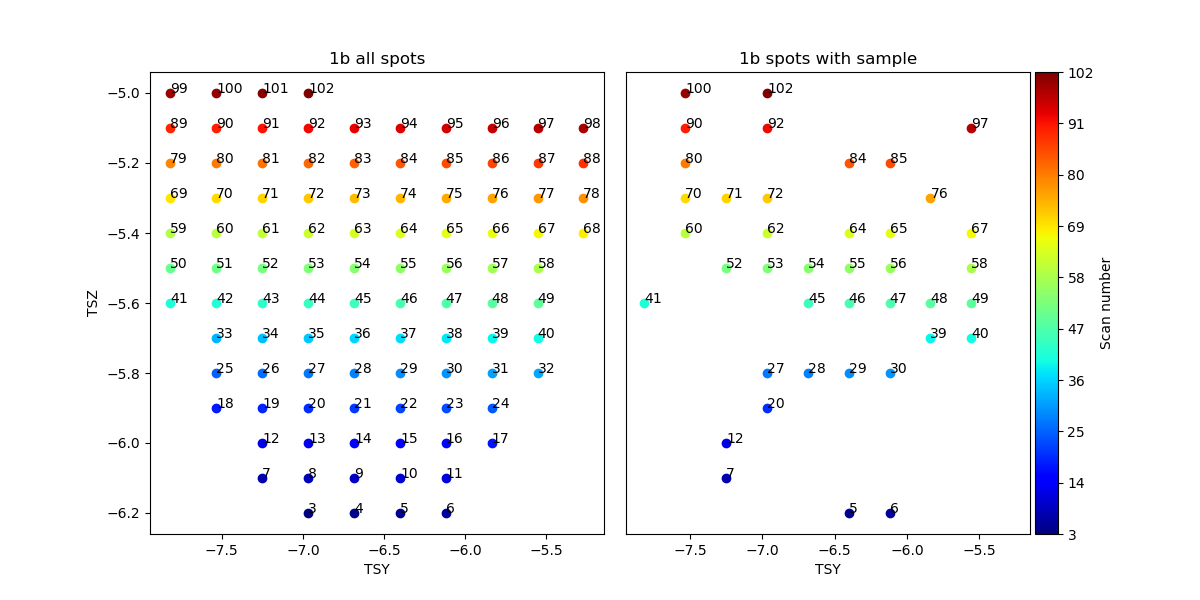

<IPython.core.display.Javascript object>


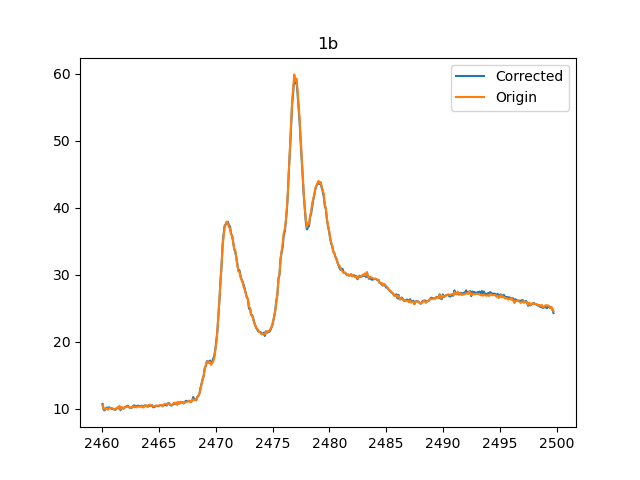

<IPython.core.display.Javascript object>


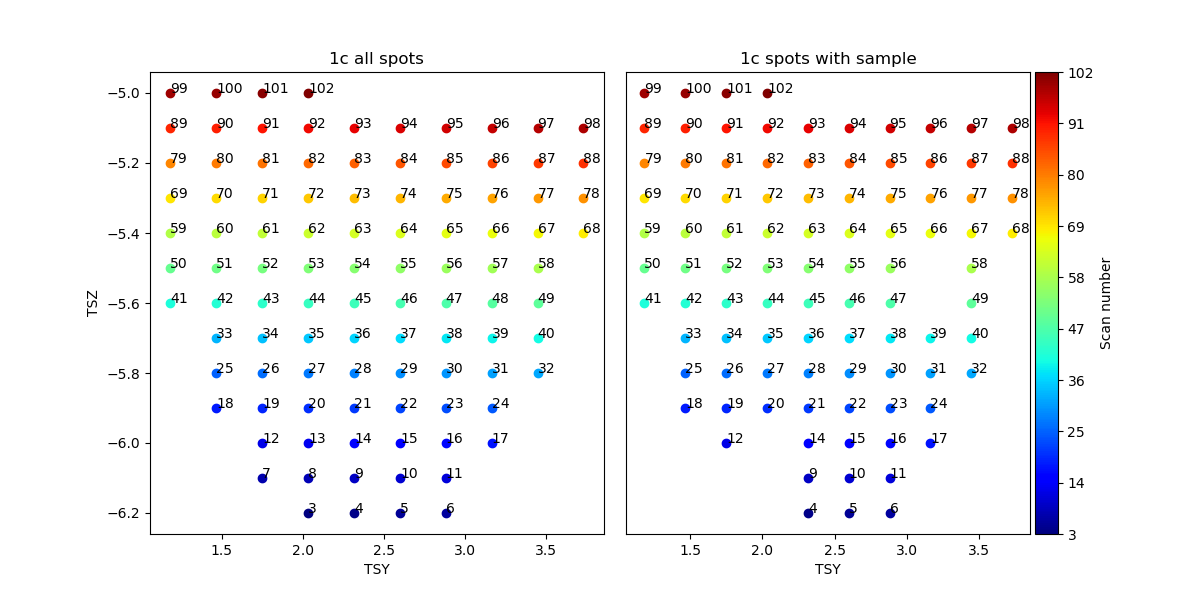

<IPython.core.display.Javascript object>


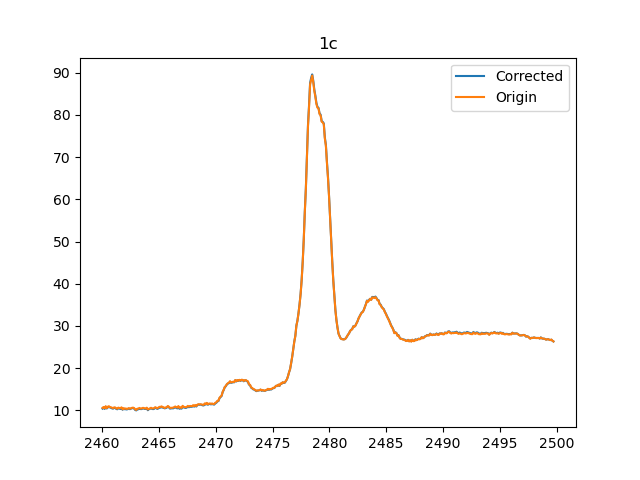

<IPython.core.display.Javascript object>


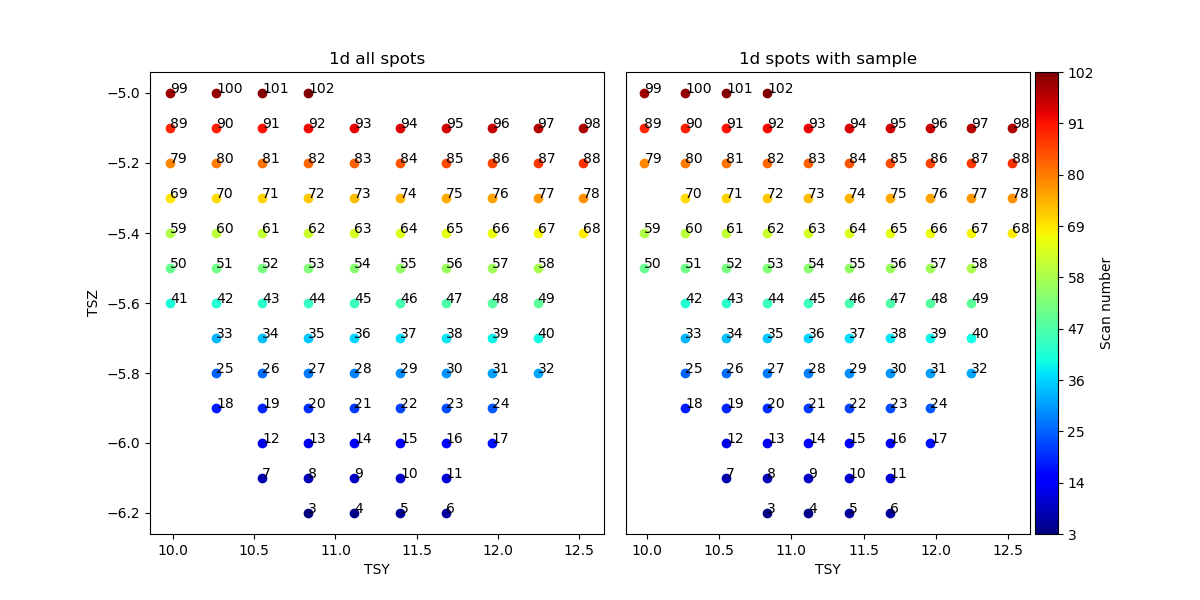

<IPython.core.display.Javascript object>


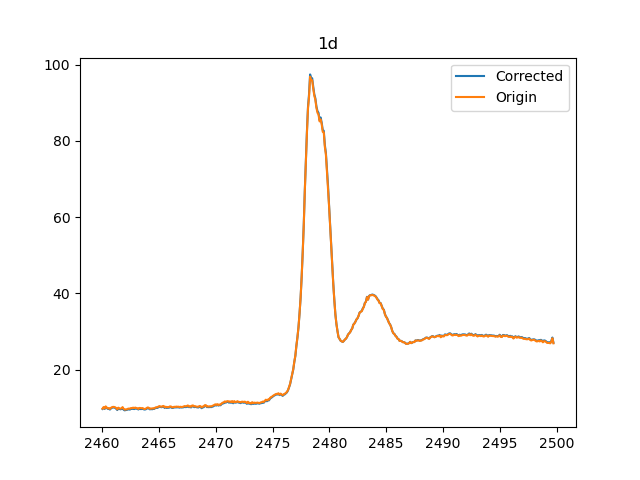

<IPython.core.display.Javascript object>


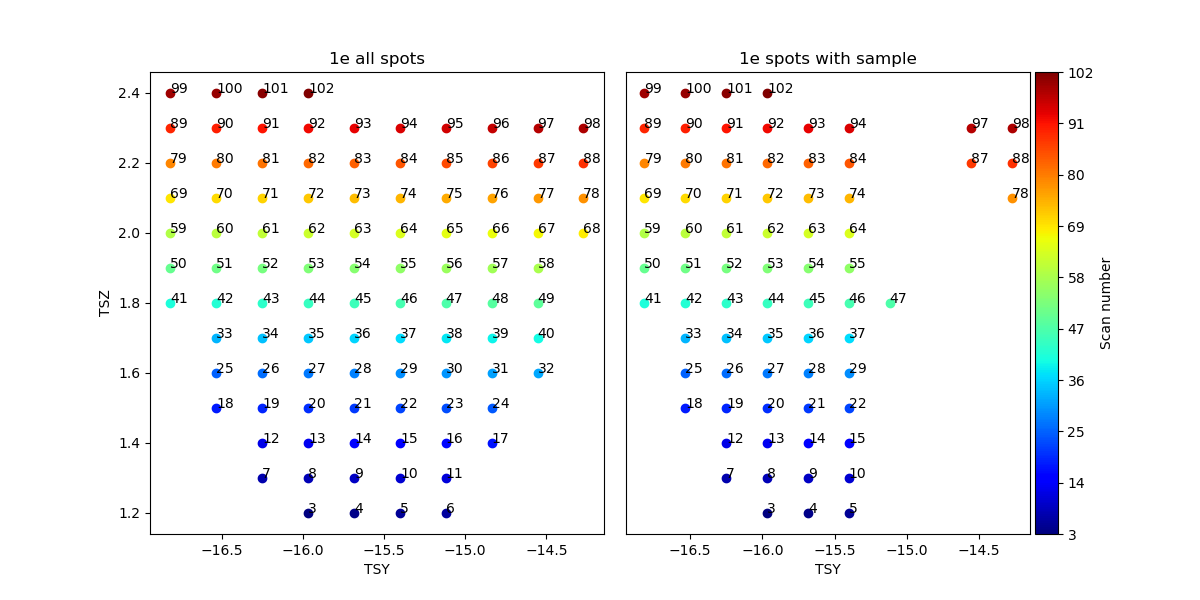

<IPython.core.display.Javascript object>


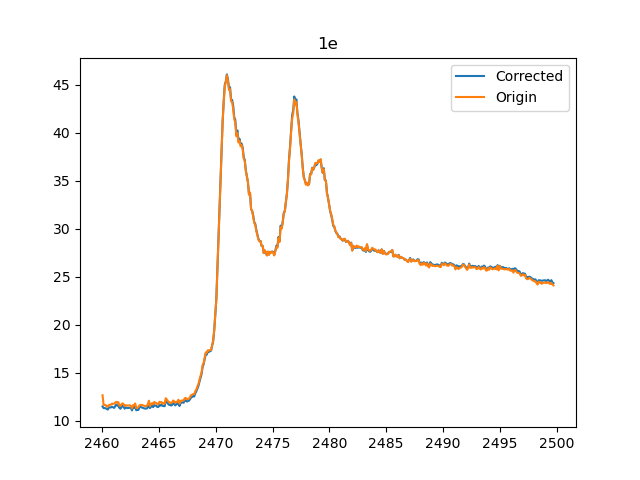

<IPython.core.display.Javascript object>


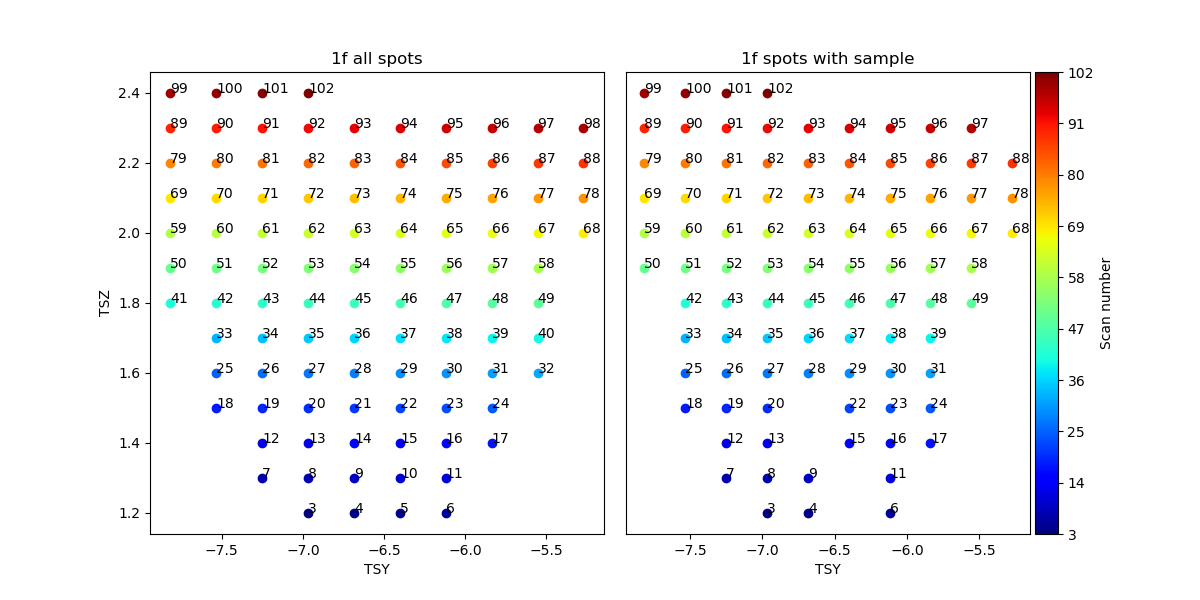

<IPython.core.display.Javascript object>


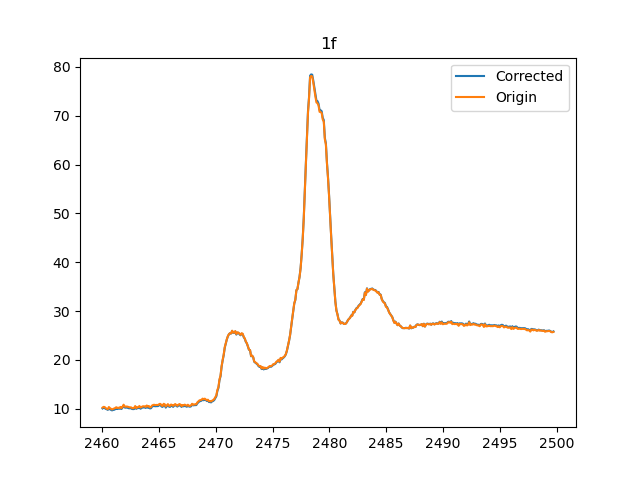

<IPython.core.display.Javascript object>


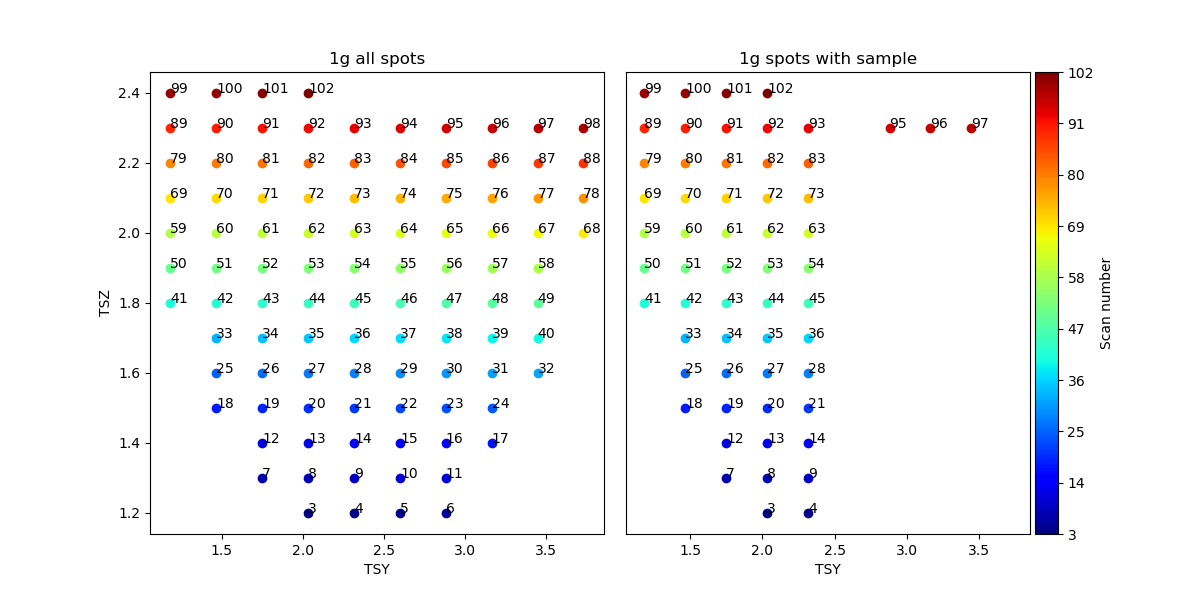

<IPython.core.display.Javascript object>


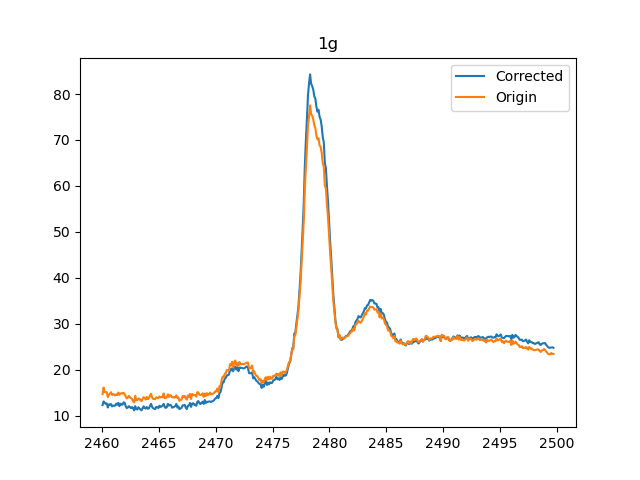

<IPython.core.display.Javascript object>


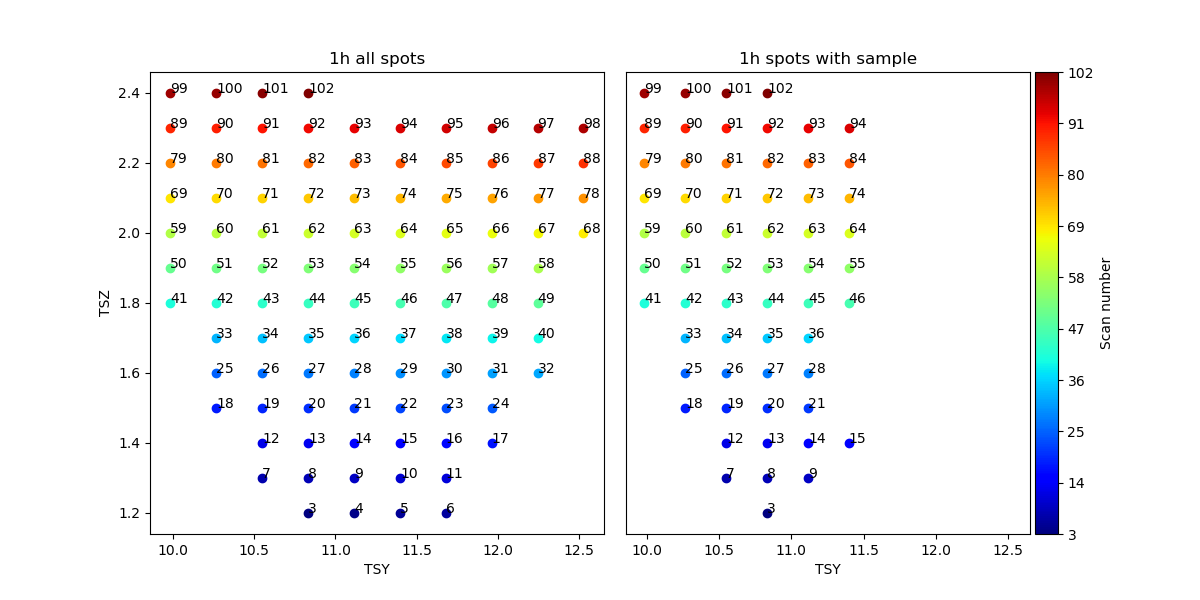

<IPython.core.display.Javascript object>


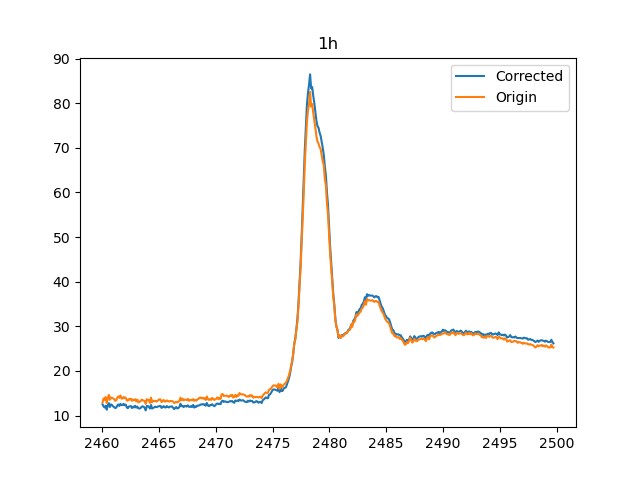

In [55]:
for q in name:

    file = r'C:\Users\oppcexpv\Downloads\252_data\252-' + q + r'\252-' + q + r'_xanes\252-' + q + r'_xanes.h5'
    file = file.replace('\\', '/')

    a = np.linspace(3.1, 102.1, 100)
    b = np.linspace(3.2, 102.2, 100)

    TSY = []
    TSZ = []
    energy = []
    gdall = []
    I0t = []

    with h5py.File(file, 'r') as f:
        for i in a:
            #print(i)
            g = f.get('%s/instrument/hdh_energy' %f'{i}')
            energy.append(np.array(g.get('data')))
            h = f.get('%s/instrument/gdall' %f'{i}')
            gdall.append(np.array(h.get('data')))
            l = f.get('%s/instrument/I0t' %f'{i}')
            I0t.append(np.array(l.get('data')))

        for i in b:
            #print(i)
            g = f.get('%s/instrument/TSY_cnt' %f'{i}')
            TSY.append(np.array(g.get('data'))[0])
            h = f.get('%s/instrument/TSZ_cnt' %f'{i}')
            TSZ.append(np.array(h.get('data'))[0])

 #####################################
    intensity = []
    for i in range(len(energy)):
        intensity.append(np.divide(gdall[i], I0t[i]))

    ok = []
    ok_3 = []
    for n in range(len(energy)): 
        head =  intensity[n][:50]
        head = head[abs(stats.zscore(head))<2]  #remove outlier, z-score>3
        tail = intensity[n][-50:]
        tail = tail[abs(stats.zscore(tail))<2]  #remove outlier, z-score>3
        middle = intensity[n][200:250]
        middle = middle[abs(stats.zscore(middle))<2]

        if ((tail.mean()/head.mean() > 0.7) and (middle.mean()>head.mean())):
            ok.append(n)
            ok_3.append(n+3)
 #####################################
    #fig=plt.figure()
    fig = plt.figure(figsize=(12, 6), dpi=100)
    grid = plt.GridSpec(1, 2, hspace=0.25, wspace=0.05)
    ax1 = fig.add_subplot(grid[0, 0])
    ax2 = fig.add_subplot(grid[0, 1])

    cmap = plt.cm.get_cmap("jet")
    norm = mpl.colors.Normalize(vmin = 3, vmax = 102)
    sm = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
    sm.set_array([])
    colors = plt.cm.jet(np.linspace(0, 1, 100))
    ticks = np.linspace(3, 102, 10)
    cbar = plt.colorbar(mappable = sm, ticks=ticks, format=mpl.ticker.ScalarFormatter(), 
                        shrink=1.0, fraction=0.1, pad=0.01, label='Scan number')
    for i in ok:
        ax2.scatter(TSY[i], TSZ[i] ,color = colors[i])
        ax2.text(TSY[i], TSZ[i], i+3)

    for i in range(len(TSY)):
        ax1.scatter(TSY[i], TSZ[i], color=colors[i])
        ax1.text(TSY[i], TSZ[i], i+3)
    ''' '''
    ax1.set_xlabel('TSY')
    ax2.set_xlabel('TSY')
    ax1.set_xlim(min(TSY)-0.125, max(TSY)+0.125)
    ax2.set_xlim(min(TSY)-0.125, max(TSY)+0.125)
    ax1.set_ylabel('TSZ')
    ax2.set_yticks([])
    ax1.set_title('%s all spots'%q)
    ax2.set_title('%s spots with sample'%q)
    plt.savefig('%s spots.png'%q, bbox_inches='tight')
 #####################################
    source = Source(file, ok_3) #3-102 for XAS, #1-12 for XES
    measurment_XAS = Xas(source,counters=counter_XAS)
    measurment_XAS.find_outliers()
    measurment_XAS.remove_outliers()
    measurment_XAS.normalize(mode = 'area')
    np.savetxt(q+'_XAS_BT2.txt',np.c_[measurment_XAS.x*1000, measurment_XAS.signal] )
    
    source2 = Source(file, list(range(3,102)), None) #3-102 for XAS, #1-12 for XES
    measurment_XAS2 = Xas(source2,counters=counter_XAS)
    measurment_XAS2.find_outliers()
    measurment_XAS2.remove_outliers()
    measurment_XAS2.normalize(mode = 'area')

    fig=plt.figure()

    plt.plot(measurment_XAS.x*1000, measurment_XAS.signal, label='Corrected')
    plt.plot(measurment_XAS2.x*1000, measurment_XAS2.signal, label='Origin')

    plt.title('%s'%q)
    plt.legend()
    plt.savefig('%s correction.png'%q, bbox_inches='tight')

# XES

<IPython.core.display.Javascript object>


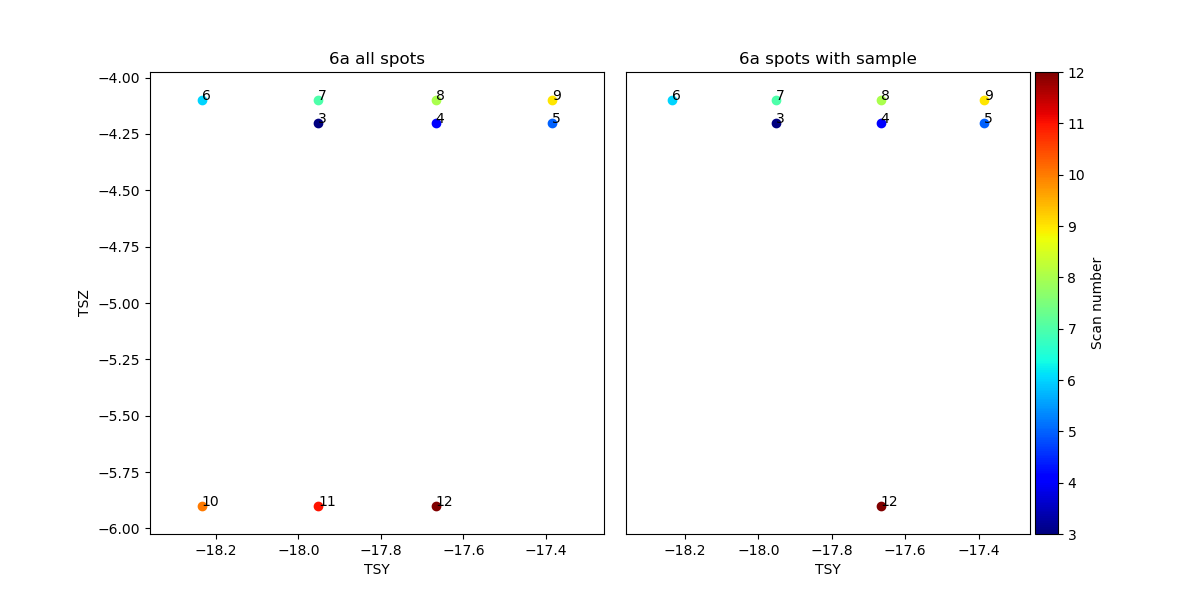

<IPython.core.display.Javascript object>


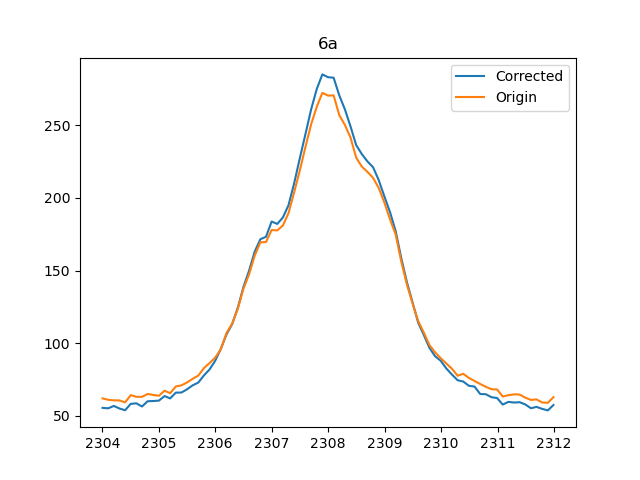

<IPython.core.display.Javascript object>


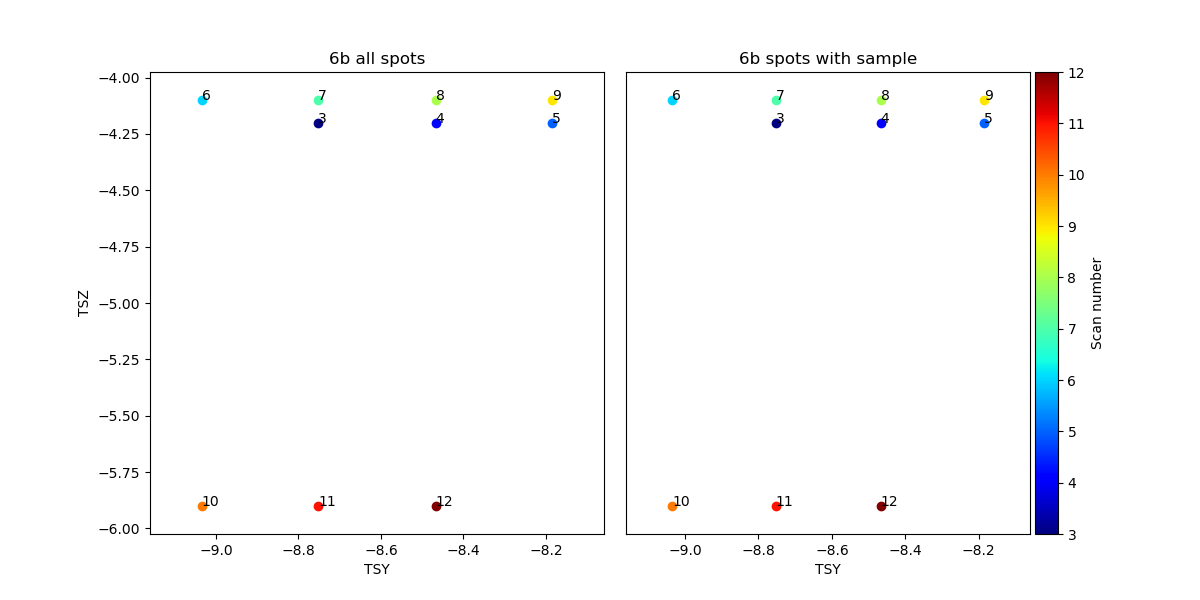

<IPython.core.display.Javascript object>


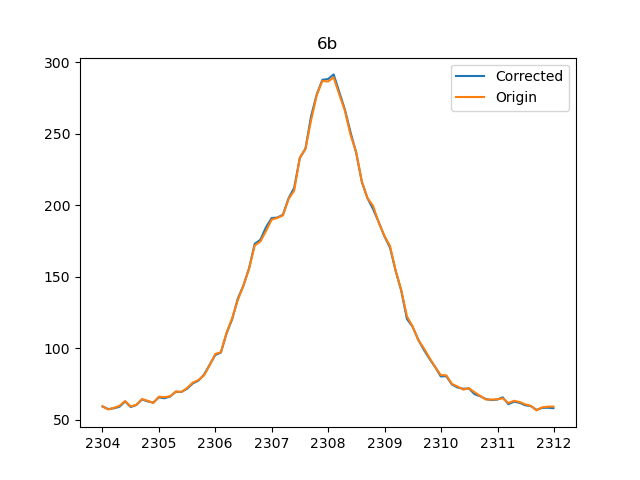

<IPython.core.display.Javascript object>


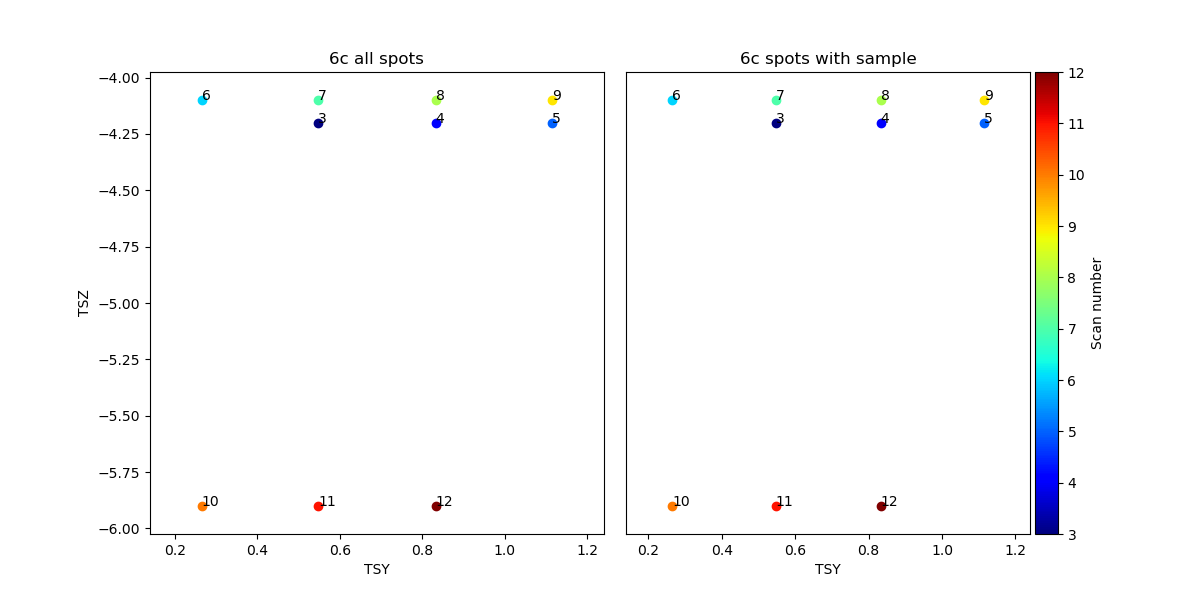

<IPython.core.display.Javascript object>


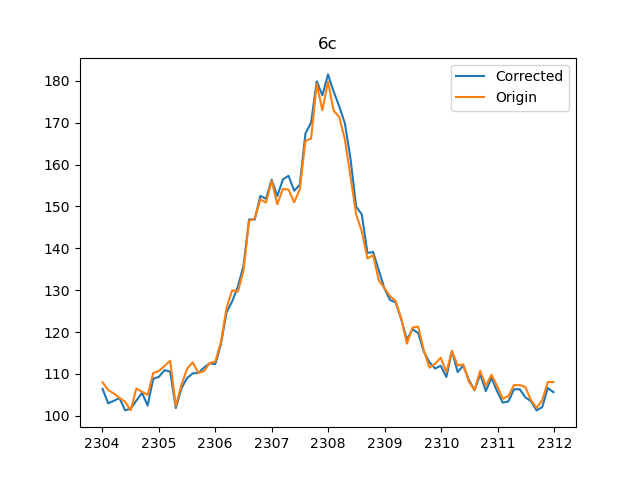

<IPython.core.display.Javascript object>


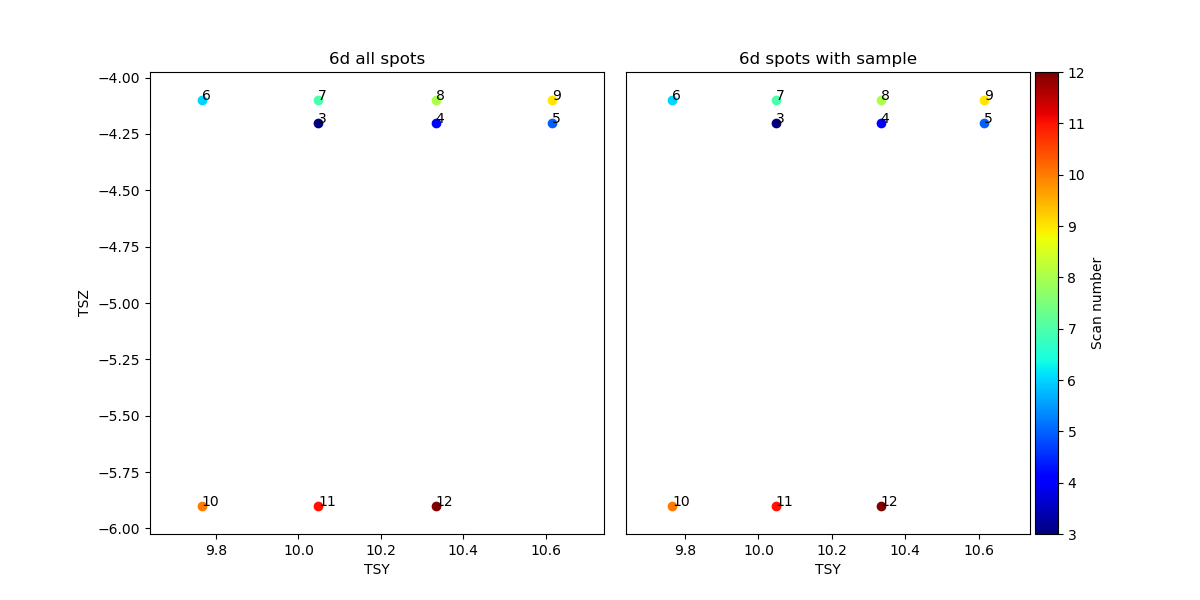

<IPython.core.display.Javascript object>


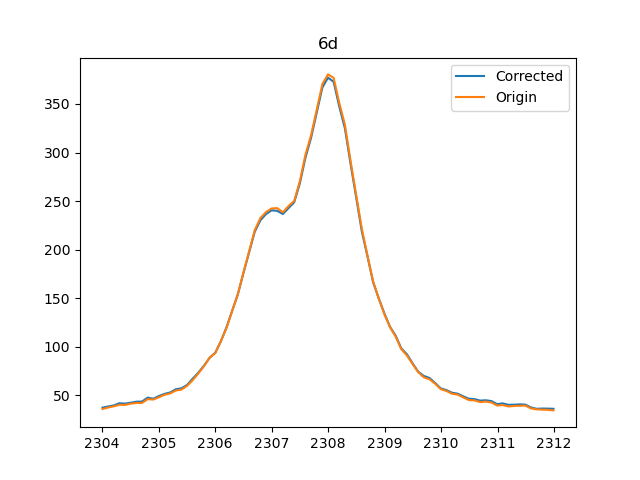

<IPython.core.display.Javascript object>


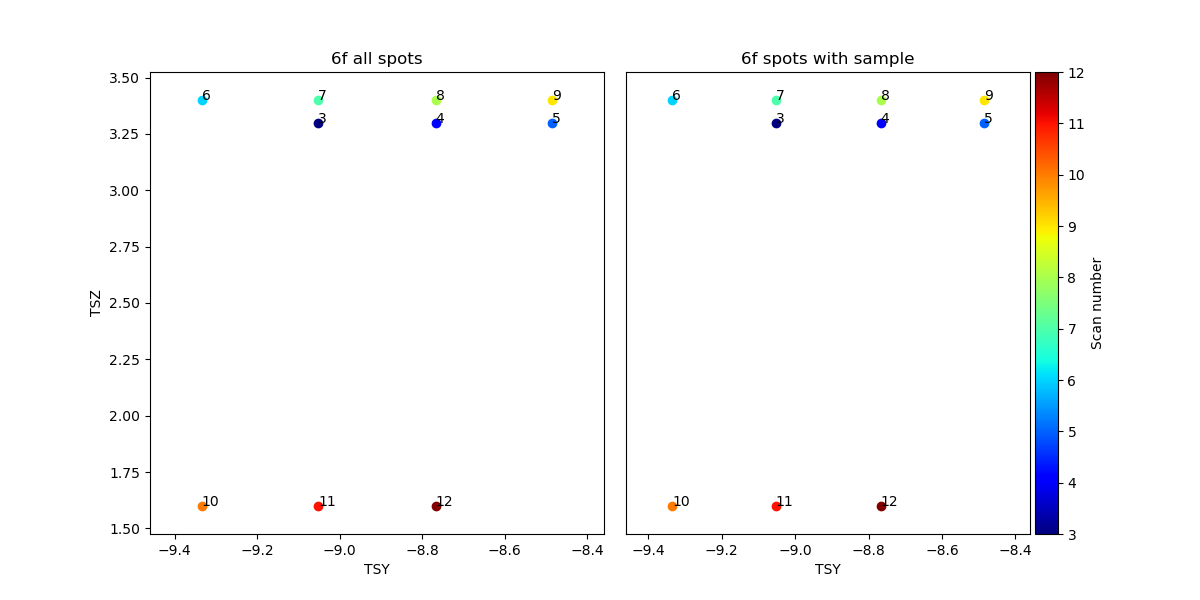

<IPython.core.display.Javascript object>


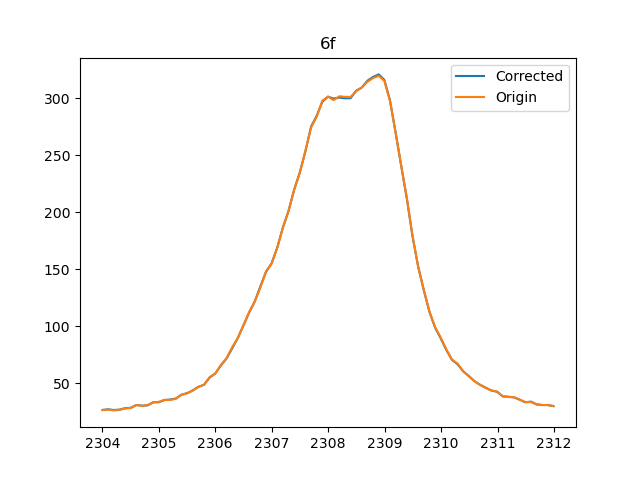

<IPython.core.display.Javascript object>


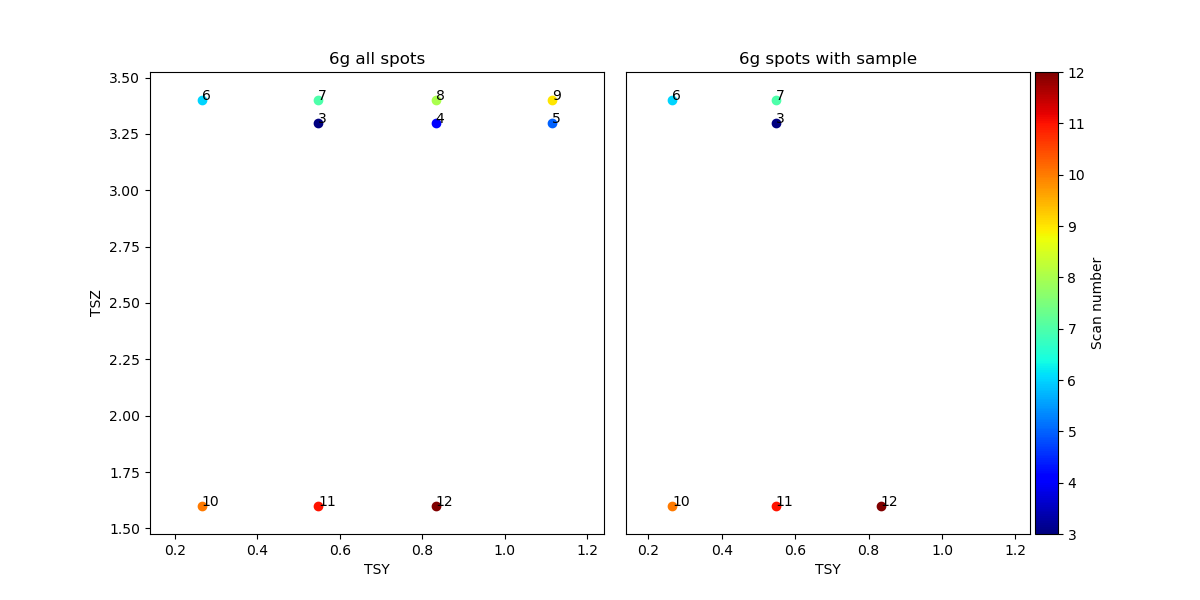

<IPython.core.display.Javascript object>


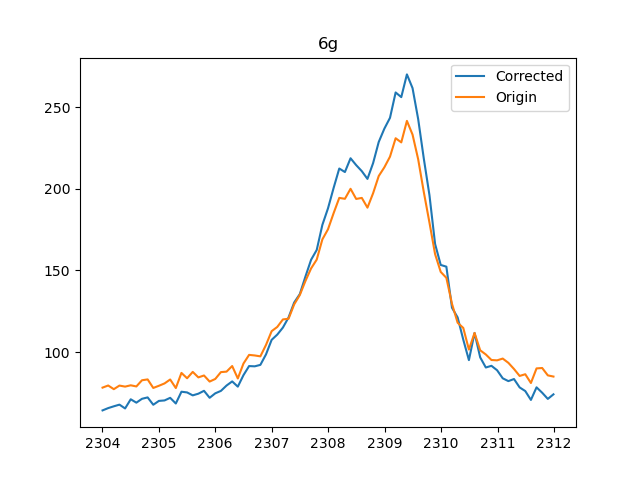

<IPython.core.display.Javascript object>


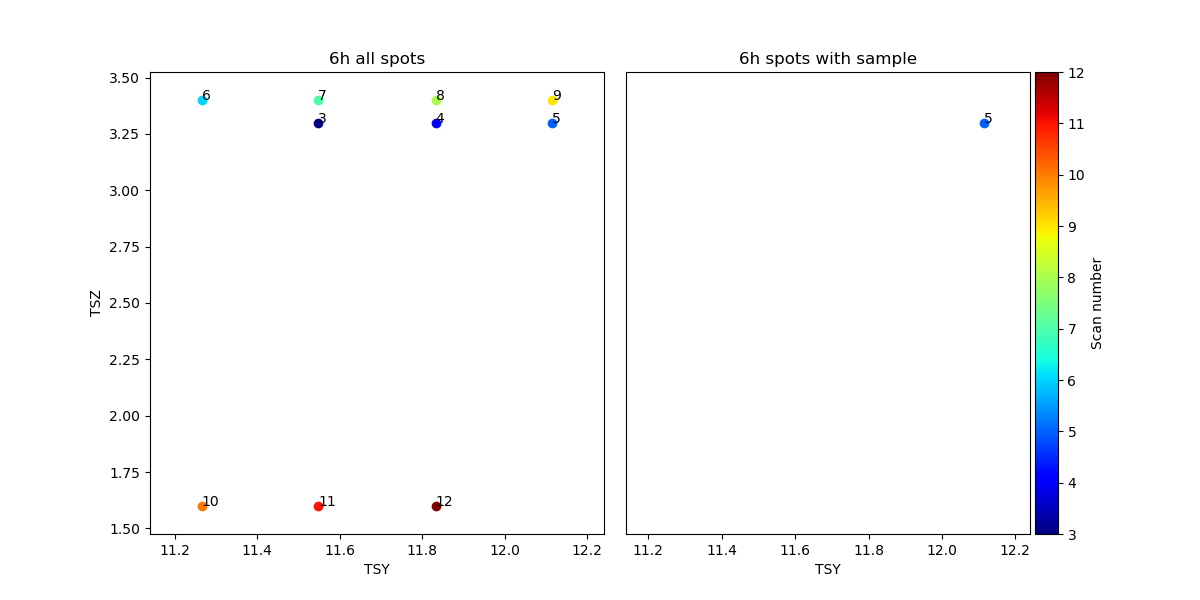

<IPython.core.display.Javascript object>


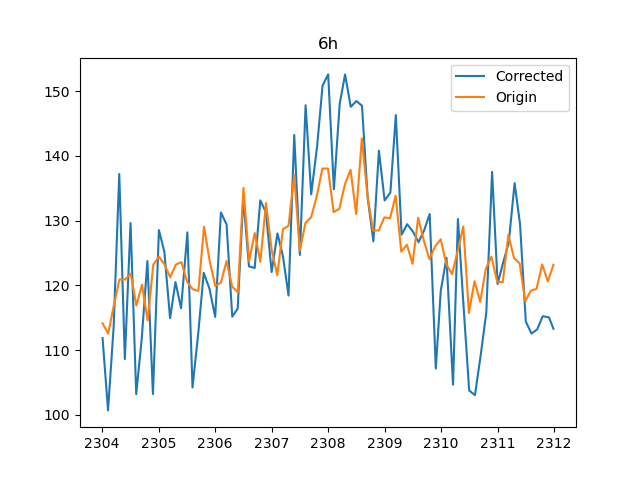

<IPython.core.display.Javascript object>


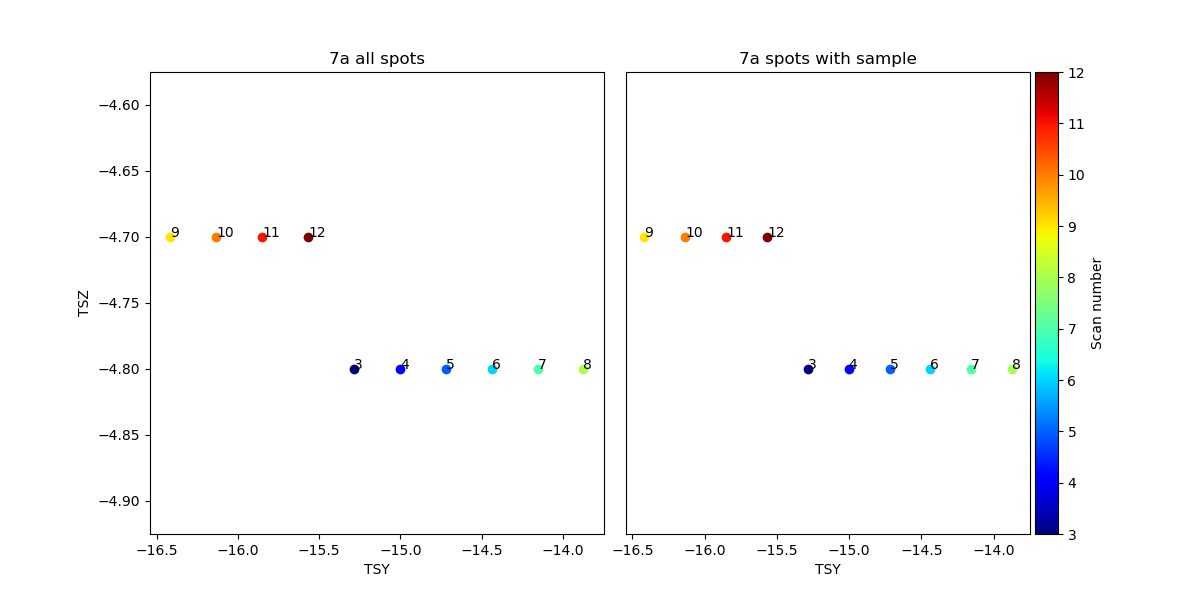

<IPython.core.display.Javascript object>


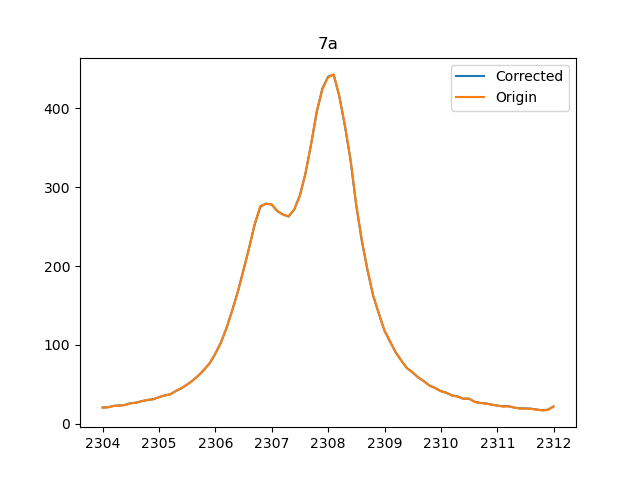

<IPython.core.display.Javascript object>


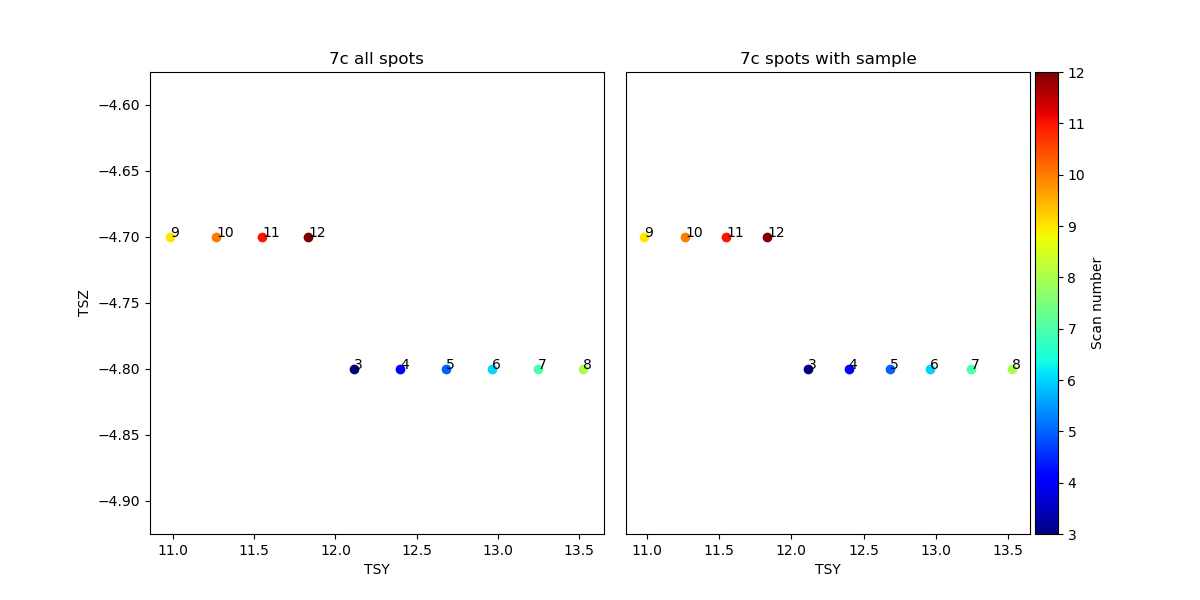

<IPython.core.display.Javascript object>


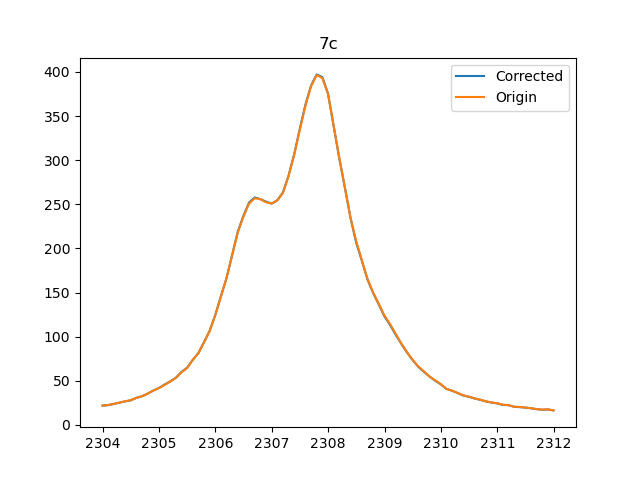

<IPython.core.display.Javascript object>


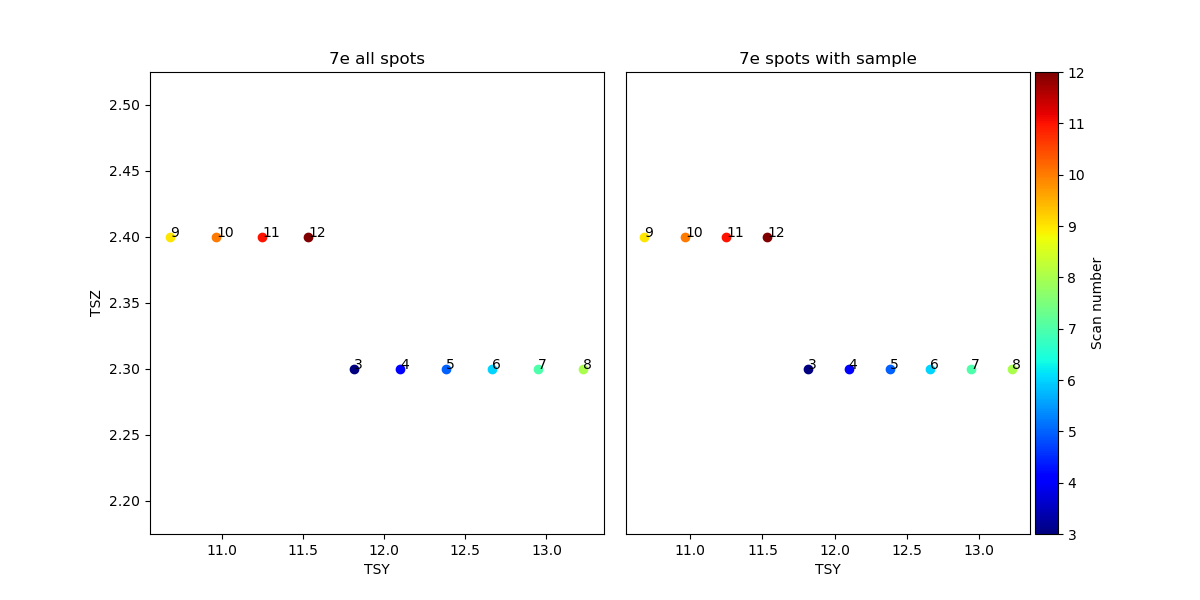

<IPython.core.display.Javascript object>


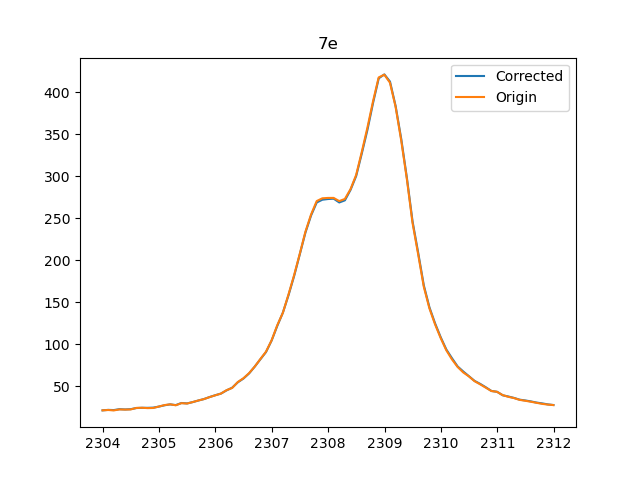

In [97]:
for q in name:
    file = r'C:\Users\oppcexpv\Downloads\252_data\252-' + q + r'\252-' + q + r'_xes\252-' + q + r'_xes.h5'
    file = file.replace('\\', '/')

    a = np.linspace(3.1, 12.1, 10)

    energy = []
    gdall = []
    I0t = []
    TSY = []
    TSZ = []

    with h5py.File(file, 'r') as f:
        for i in a:
            #print(i)
            g = f.get('%s/instrument/xes_en_texs' %f'{i}')
            energy.append(np.array(g.get('data')))
            h = f.get('%s/instrument/gdall' %f'{i}')
            gdall.append(np.array(h.get('data')))
            l = f.get('%s/instrument/I0t' %f'{i}')
            I0t.append(np.array(l.get('data')))
            g = f.get('%s/instrument/TSY_cnt' %f'{i}')
            TSY.append(np.array(g.get('data'))[0])
            h = f.get('%s/instrument/TSZ_cnt' %f'{i}')
            TSZ.append(np.array(h.get('data'))[0])
    intensity = []
    for i in range(len(energy)):
        intensity.append(np.divide(gdall[i], I0t[i]))
##########################################################
    ok = []
    ok_3 = []
    for n in range(len(energy)): 
        head =  intensity[n][:10]
        head = head[abs(stats.zscore(head))<2]  #remove outlier, z-score>3
        tail = intensity[n][-10:]
        tail = tail[abs(stats.zscore(tail))<2]  #remove outlier, z-score>3
        middle = intensity[n][30:50]
        #middle = middle[abs(stats.zscore(middle))<2]

        if ((middle.mean()>tail.mean()*1.15) and (middle.mean()>head.mean()*1.15)): #####################################
            ok.append(n)
            ok_3.append(n+3)
##########################################################
    fig = plt.figure(figsize=(12, 6), dpi=100)
    grid = plt.GridSpec(1, 2, hspace=0.25, wspace=0.05)
    ax1 = fig.add_subplot(grid[0, 0])
    ax2 = fig.add_subplot(grid[0, 1])

    cmap = plt.cm.get_cmap("jet")
    norm = mpl.colors.Normalize(vmin = 3, vmax = 12)
    sm = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
    sm.set_array([])
    colors = plt.cm.jet(np.linspace(0, 1, 10))
    ticks = np.linspace(3, 12, 10)
    cbar = plt.colorbar(mappable = sm, ticks=ticks, format=mpl.ticker.ScalarFormatter(), 
                        shrink=1.0, fraction=0.1, pad=0.01, label='Scan number')

    for i in ok:
        ax2.scatter(TSY[i], TSZ[i] ,color = colors[i])
        ax2.text(TSY[i], TSZ[i], i+3)

    for i in range(len(TSY)):
        ax1.scatter(TSY[i], TSZ[i], color = colors[i])
        ax1.text(TSY[i], TSZ[i], i+3)

    ax1.set_xlabel('TSY')
    ax2.set_xlabel('TSY')
    ax1.set_xlim(min(TSY)-0.125, max(TSY)+0.125)
    ax2.set_xlim(min(TSY)-0.125, max(TSY)+0.125)
    ax1.set_ylim(min(TSZ)-0.125, max(TSZ)+0.125)
    ax2.set_ylim(min(TSZ)-0.125, max(TSZ)+0.125)
    ax1.set_ylabel('TSZ')
    ax2.set_yticks([])
    ax1.set_title('%s all spots'%q)
    ax2.set_title('%s spots with sample'%q)
    ''' '''
    plt.savefig('%s XES spots.png'%q, bbox_inches='tight')
##########################################################
    source = Source(file, ok_3) #3-102 for XAS, #1-12 for XES
    measurment_XES = Xes(source,counters=counter_XES)
    measurment_XES.find_outliers()
    measurment_XES.remove_outliers()
    measurment_XES.normalize(mode = 'area')
    pd.DataFrame([measurment_XES.x*1000, measurment_XES.signal]).T.to_csv(q+'_XES_BT2.csv', header=False, index=False)

    source2 = Source(file, list(range(3,12)), None) #3-102 for XAS, #1-12 for XES
    measurment_XES2 = Xas(source2,counters=counter_XES)
    measurment_XES2.find_outliers()
    measurment_XES2.remove_outliers()
    measurment_XES2.normalize(mode = 'area')
    
    fig=plt.figure()

    plt.plot(measurment_XES.x*1000, measurment_XES.signal, label='Corrected')
    plt.plot(measurment_XES2.x*1000, measurment_XES2.signal, label='Origin')
    #plt.text(2304, measurment_XES.signal.max(), ok_3)

    plt.title('%s'%q)
    plt.legend()
    plt.savefig('%s XES correction.png'%q, bbox_inches='tight')

In [84]:
colors.shape

(10, 4)